In [30]:
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
from scipy import signal

In [80]:
img_clean = 'C:/Users/phmin/Desktop/Blind Deconvolution/fastdeconv/online_code/Levin09_im08_filt04_orig.tif'
img_noisy = 'C:/Users/phmin/Desktop/Blind Deconvolution/fastdeconv/online_code/Levin09_im08_filt04_blurry.tif'
Xc = imageio.v2.imread(img_clean)
Yb = imageio.v2.imread(img_noisy)

Xc.astype('float')
Yb.astype('float')

Xc = Xc/ np.max(Xc)
Yb = Yb/ np.max(Yb)


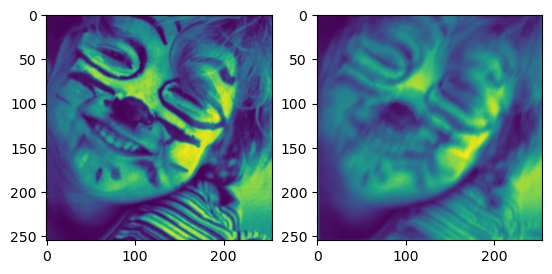

In [11]:
plt.subplot(121)
plt.imshow(Xc);
plt.subplot(122)
plt.imshow(Yb);

In [81]:
k_size=31;
padsz = k_size//2
Ybc = Yb[padsz:-padsz, padsz:-padsz]


ld=0
ker0 = np.zeros((k_size,k_size))
ker0[padsz-1:padsz+3,padsz-1:padsz+3]=1
ker0 = ker0/np.sum(ker0)

ker = np.copy(ker0)
w_l1 = ld / np.maximum( 0.0001, np.abs(ker))
print('w_l1 shape=',w_l1.shape)

flipX = np.rot90(Xc, 2)
#plt.imshow(flipX)
RHS = signal.convolve2d(flipX, Ybc, mode='valid')
print('RHS shape = ',Xc.shape)

#compute kX
kX = signal.convolve2d(Xc,ker, mode='valid')
XtkX = signal.convolve2d(flipX,kX, mode='valid')
XtkX = XtkX + w_l1*ker

r = RHS - XtkX

w_l1 shape= (31, 31)
RHS shape =  (255, 255)


In [82]:
for iter in range(30):
    rho = np.linalg.norm(r,ord='fro')**2
    if iter>0:
        beta = rho/rho_1
        p = r + beta*p
    else:
        p = r   
    #end if
    
    #compute XtpX
    pX = signal.convolve2d(Xc,p, mode='valid')
    XtpX = signal.convolve2d(flipX,pX, mode='valid')
    XtpX += w_l1*p
        
    q = XtpX
    alpha = rho / np.sum (p*q)
    ker = ker + alpha * p
    r   = r   - alpha * q
    rho_1 = rho
    
    if True:
        X_k = signal.convolve2d(Xc,ker, mode='valid')
        print('error=', np.linalg.norm(X_k - Ybc,ord='fro') / np.linalg.norm(Ybc,ord='fro') )
    #end
#

error= 0.3123748391474598
error= 0.170755449026437
error= 0.13752721008329263
error= 0.11919941303114773
error= 0.09610019999736384
error= 0.08238484464428308
error= 0.07040983724988605
error= 0.06262832586640649
error= 0.06209116150855164
error= 0.05048937909377244
error= 0.04285000113843168
error= 0.0377664716288317
error= 0.03398862120984112
error= 0.029659087196829085
error= 0.026804273331178123
error= 0.026784742584411055
error= 0.023449085022507626
error= 0.020948407239362938
error= 0.01933265326870054
error= 0.018347249415481406
error= 0.017664910244867906
error= 0.016621774505084355
error= 0.016575879754001956
error= 0.016194432152554675
error= 0.01573272413523136
error= 0.014740644705278609
error= 0.01416332734140281
error= 0.0139379849601984
error= 0.013606075894135766
error= 0.013446647711198476


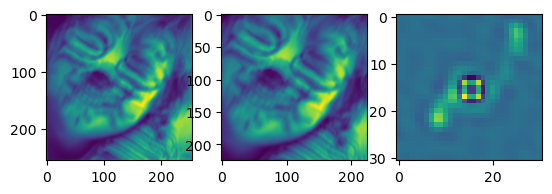

In [83]:
plt.subplot(1,3,1)
plt.imshow(Yb)
plt.subplot(1,3,2)
plt.imshow( signal.convolve2d(Xc,ker, mode='valid') )
plt.subplot(1,3,3)
plt.imshow(ker)

In [74]:
aa = np.array([[3,4],[2,5]])
bb = np.array([[1,1],[2,2]])
print(np.linalg.norm(aa,ord='fro')**2)
print(np.sum(aa*bb))

54.0
21
